In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from eofs.xarray import Eof

# Part 1

In [2]:
ds = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds633.1/2/TP',
                     chunks={'time':'500MB'})
variables = ['Total_column_water_vapour_surface_Mixed_intervals_Average',
        'Sea_surface_temperature_surface_Mixed_intervals_Average']
#select the two needed variables every 4th point to get 1 degree resolution
ds = ds[variables].sel(lat=slice(65, -65, 4), lon=slice(120, 300, 4)).load()
water_vapor = ds['Total_column_water_vapour_surface_Mixed_intervals_Average']
sst = ds['Sea_surface_temperature_surface_Mixed_intervals_Average']
water_vapor

/home/brad/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
ecCodes library not found using ['eccodes', 'libeccodes.so', 'libeccodes']
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.DataArray 'Total_column_water_vapour_surface_Mixed_intervals_Average' (
                                                                               time: 516,
                                                                               lat: 130,
                                                                               lon: 181)>
array([[[ 1.0963566,  1.1393254,  1.1783879, ...,  3.9752629,
          4.121747 ,  4.288739 ],
        [ 1.0787785,  1.1207707,  1.155927 , ...,  4.0983095,
          4.2789736,  4.494794 ],
        [ 1.0455754,  1.0846379,  1.1100285, ...,  4.322919 ,
          4.5358095,  4.7653017],
        ...,
        [ 7.7789736,  7.804364 ,  7.784833 , ..., 10.812177 ,
         10.616864 , 10.352216 ],
        [ 7.361005 ,  7.4069033,  7.4733095, ...,  9.966474 ,
          9.878583 ,  9.584638 ],
        [ 7.055341 ,  7.09538  ,  7.1520205, ...,  9.430341 ,
          7.1070986,  5.3082705]],

       [[ 1.3328004,  1.3347535,  1.3328004, ...,  3.153113 ,
          3.3884645,  3.6101441],
        [ 1.4617066,  1.4646363,  1.458777 , ...,  3.4333863,
          3.7517457,  4.1267457],
        [ 1.5632691,  1.5417848,  1.505652 , ...,  3.8679566,
          4.3054566,  4.7097535],
...
        [ 5.3542223,  5.3981676,  5.457738 , ...,  8.306371 ,
          8.258519 ,  8.167699 ],
        [ 4.987035 ,  5.027074 ,  5.067113 , ...,  8.026097 ,
          8.069066 ,  7.8649645],
        [ 4.5973864,  4.6325426,  4.7018785, ...,  7.5925035,
          5.5768785,  3.890355 ]],

       [[ 1.7283968,  1.6912874,  1.6571077, ...,  4.5242953,
          4.685428 ,  4.9364047],
        [ 1.7869905,  1.747928 ,  1.707889 , ...,  4.601444 ,
          4.804569 ,  5.0662875],
        [ 1.8035921,  1.7615999,  1.7098421, ...,  4.7362094,
          4.9832797,  5.232303 ],
        ...,
        [ 8.625857 ,  8.701053 ,  8.73035  , ...,  9.149295 ,
          9.100467 ,  8.997928 ],
        [ 8.394412 ,  8.287967 ,  8.1366   , ...,  8.719607 ,
          8.747928 ,  8.56824  ],
        [ 7.4588656,  7.3162875,  7.1532016, ...,  8.381717 ,
          6.3280063,  4.570194 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Attributes: (12/14)
    long_name:                       Total column water vapour (Mixed_interva...
    units:                           kg m**-2
    grid_mapping:                    LatLon_Projection
    Grib_Statistical_Interval_Type:  Average
    Grib_Variable_Id:                VAR_98-0-128-137_L1_Imixed_S123
    Grib1_Center:                    98
    ...                              ...
    Grib1_Parameter:                 137
    Grib1_Parameter_Name:            tcwv
    Grib1_Level_Type:                1
    Grib1_Level_Desc:                Ground or water surface
    Grib1_Interval_Type:             123
    Grib1_Interval_Name:             Average of N uninitialized analyses, int...

In [3]:
sst

<xarray.DataArray 'Sea_surface_temperature_surface_Mixed_intervals_Average' (
                                                                             time: 516,
                                                                             lat: 130,
                                                                             lon: 181)>
array([[[      nan,       nan,       nan, ..., 271.4602 , 271.4602 ,
         271.46118],
        [      nan,       nan,       nan, ..., 271.4602 , 271.48364,
         272.14478],
        [      nan,       nan,       nan, ..., 271.552  , 272.31372,
         273.4436 ],
        ...,
        [274.55103, 274.42798, 274.44263, ..., 274.1233 , 274.2151 ,
         274.1526 ],
        [273.76782, 273.75806, 273.69067, ..., 273.75024, 274.1194 ,
         273.81274],
        [273.04907, 273.0647 , 272.99927, ..., 272.13013, 271.44165,
               nan]],

       [[      nan,       nan,       nan, ..., 271.4602 , 271.4602 ,
         271.4602 ],
        [      nan,       nan,       nan, ..., 271.4602 , 271.46313,
         271.89087],
        [      nan,       nan,       nan, ..., 271.51196, 272.2522 ,
         273.1565 ],
...
        [272.20654, 272.2163 , 272.20654, ..., 272.86963, 273.20166,
         273.23584],
        [271.6831 , 271.85596, 272.0249 , ..., 272.9204 , 273.1001 ,
         272.63135],
        [271.46045, 271.46045, 271.46045, ..., 273.0044 , 271.98682,
               nan]],

       [[      nan,       nan,       nan, ..., 271.58057, 271.6001 ,
         271.63037],
        [      nan,       nan,       nan, ..., 271.6255 , 271.7202 ,
         272.53467],
        [      nan,       nan,       nan, ..., 271.78076, 272.86572,
         274.38916],
        ...,
        [272.9165 , 272.938  , 272.93604, ..., 273.62842, 273.8921 ,
         273.86865],
        [272.7915 , 272.8169 , 272.89404, ..., 273.56396, 273.6831 ,
         273.01416],
        [272.1079 , 272.24658, 272.38818, ..., 273.78857, 272.8042 ,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Attributes: (12/15)
    long_name:                       Sea surface temperature (Mixed_intervals...
    units:                           K
    description:                     v-component of wind
    grid_mapping:                    LatLon_Projection
    Grib_Statistical_Interval_Type:  Average
    Grib_Variable_Id:                VAR_98-0-128-34_L1_Imixed_S123
    ...                              ...
    Grib1_Parameter:                 34
    Grib1_Parameter_Name:            sst
    Grib1_Level_Type:                1
    Grib1_Level_Desc:                Ground or water surface
    Grib1_Interval_Type:             123
    Grib1_Interval_Name:             Average of N uninitialized analyses, int...

In [4]:
mask = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.invariant/197901/e5.oper.invariant.128_172_lsm.ll025sc.1979010100_1979010100.nc').sel(latitude=slice(65, -65, 1),longitude=slice(120, 300, 1)).compute()['LSM']
# Reduce the data resolution to 1 degree, so the degree resolution matches sst anom
mask = mask.interp(latitude=sst.lat, longitude=sst.lon)
mask = mask.squeeze(['time'], drop=True) == 0
mask

<xarray.DataArray 'LSM' (lat: 130, lon: 181)>
array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])
Coordinates:
    latitude   (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
    longitude  (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * lat        (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon        (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0

In [5]:
sst_mean = sst.mean(dim='time').where(mask, drop=True)
water_vapor_mean= water_vapor.mean(dim='time').where(mask, drop=True)

In [6]:
def my_plot(data, X, Y, title, proj, data_crs,cbarlabel):
    fig, ax = plt.subplots(figsize=(12,4), subplot_kw=dict(projection=proj))
    c = ax.contourf(X, Y, data, transform=data_crs, cmap='cool', levels=20)
    ax.set_title(title)
    cb = fig.colorbar(c, shrink=0.8)
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    plt.show()

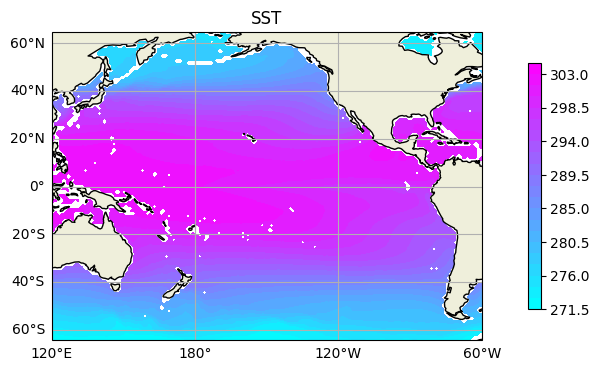

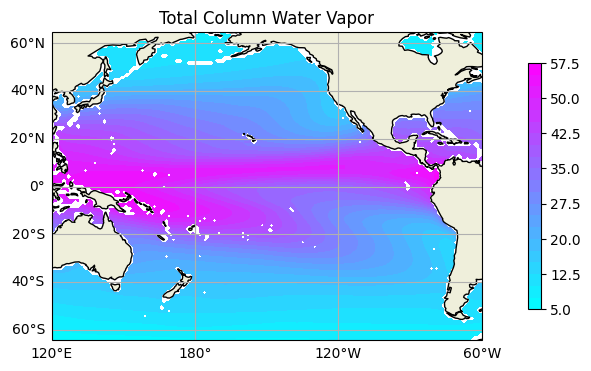

In [7]:
proj = ccrs.PlateCarree(central_longitude=180)
data_crs= ccrs.PlateCarree()
X, Y = np.meshgrid(sst_mean['lon'], sst_mean['lat'])
my_plot(sst_mean, X, Y, 'SST', proj, data_crs, 'K')
my_plot(water_vapor_mean, X, Y, 'Total Column Water Vapor', proj, data_crs, 'kg m**-2') 

# Part 2

In [8]:
sst_standardized = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    sst.groupby("time.month"),
    sst_mean,
    sst.groupby("time.month").std("time"),
)
wv_standardized = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    water_vapor.groupby("time.month"),
    water_vapor_mean,
    water_vapor.groupby("time.month").std("time"),
)

/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-pa

In [9]:
sst_standardized

<xarray.DataArray 'Sea_surface_temperature_surface_Mixed_intervals_Average' (
                                                                             time: 516,
                                                                             lat: 130,
                                                                             lon: 181)>
array([[[            nan,             nan,             nan, ...,
         -9.73443970e+02, -3.82581367e+01, -9.78867722e+00],
        [            nan,             nan,             nan, ...,
         -5.24361420e+01, -1.11303339e+01, -3.08069348e+00],
        [            nan,             nan,             nan, ...,
         -1.28179121e+01, -2.98236465e+00, -1.16668773e+00],
        ...,
        [ 3.88001657e+00,  3.55643344e+00,  3.54075527e+00, ...,
          2.52865696e+00,             nan,             nan],
        [ 2.67641854e+00,  2.56398439e+00,  2.33338070e+00, ...,
                     nan,             nan,             nan],
        [ 2.04470468e+00,  1.98500335e+00,  1.78678131e+00, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
         -4.15353223e+03, -1.87293994e+03, -9.17366486e+01],
        [            nan,             nan,             nan, ...,
         -4.09273773e+02, -5.66893654e+01, -7.17573261e+00],
        [            nan,             nan,             nan, ...,
         -2.80240040e+01, -4.77150440e+00, -1.60130620e+00],
...
         -3.69046211e-01,             nan,             nan],
        [-3.51338935e+00, -2.79341817e+00, -2.12860441e+00, ...,
                     nan,             nan,             nan],
        [-6.85899401e+00, -6.75527668e+00, -6.14826345e+00, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
         -1.27401066e+01, -1.11232967e+01, -4.93919849e+00],
        [            nan,             nan,             nan, ...,
         -6.99088907e+00, -4.05779982e+00, -1.59050798e+00],
        [            nan,             nan,             nan, ...,
         -3.08322906e+00, -1.30118656e+00, -2.39299908e-01],
        ...,
        [ 5.54831743e-01,  6.29841328e-01,  5.49088299e-01, ...,
          2.19777799e+00,             nan,             nan],
        [ 7.73383737e-01,  7.98568070e-01,  1.00701916e+00, ...,
                     nan,             nan,             nan],
        [-1.82657726e-02,  2.44059592e-01,  5.64607084e-01, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * lat        (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon        (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime    (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    latitude   (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
    longitude  (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [10]:
wv_standardized

<xarray.DataArray 'Total_column_water_vapour_surface_Mixed_intervals_Average' (
                                                                               time: 516,
                                                                               lat: 130,
                                                                               lon: 181)>
array([[[        nan,         nan,         nan, ..., -4.0324636 ,
         -3.7753255 , -3.4890835 ],
        [        nan,         nan,         nan, ..., -3.9802182 ,
         -3.659184  , -3.3206532 ],
        [        nan,         nan,         nan, ..., -3.7701256 ,
         -3.4214544 , -3.1247563 ],
        ...,
        [ 1.8997827 ,  1.8359983 ,  1.6842917 , ...,  3.524613  ,
                 nan,         nan],
        [ 1.7552363 ,  1.7564315 ,  1.7902479 , ...,         nan,
                 nan,         nan],
        [ 1.9425035 ,  1.9390113 ,  1.9631476 , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -4.512554  ,
         -4.171117  , -3.859827  ],
        [        nan,         nan,         nan, ..., -4.2000914 ,
         -3.7670252 , -3.3225448 ],
        [        nan,         nan,         nan, ..., -3.7614286 ,
         -3.2480197 , -2.832374  ],
...
        [-1.4702295 , -1.4345878 , -1.3932151 , ...,  0.6024488 ,
                 nan,         nan],
        [-1.3805219 , -1.3553021 , -1.3282838 , ...,         nan,
                 nan,         nan],
        [-1.2665911 , -1.2595193 , -1.2144752 , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -2.6022713 ,
         -2.417694  , -2.1631172 ],
        [        nan,         nan,         nan, ..., -2.6077642 ,
         -2.3942175 , -2.173388  ],
        [        nan,         nan,         nan, ..., -2.6620462 ,
         -2.4415326 , -2.2496598 ],
        ...,
        [ 2.5559044 ,  2.6656897 ,  2.7069197 , ...,  1.3621074 ,
                 nan,         nan],
        [ 2.8240254 ,  2.7082736 ,  2.5363066 , ...,         nan,
                 nan,         nan],
        [ 2.4396672 ,  2.2137191 ,  1.9486926 , ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat        (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon        (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime    (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    latitude   (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
    longitude  (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [11]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

In [12]:
sst_detrend = detrend_dim(sst_standardized,'time',1)
wv_detrend = detrend_dim(wv_standardized,'time',1)
sst_detrend

<xarray.DataArray (time: 516, lat: 130, lon: 181)>
array([[[            nan,             nan,             nan, ...,
          2.24237685e+02,  5.62863277e+02,  4.02553202e+01],
        [            nan,             nan,             nan, ...,
          4.90148665e+02,  9.68442501e+00, -7.86321902e-02],
        [            nan,             nan,             nan, ...,
         -1.18606923e+00, -4.82665479e-01, -4.83331079e-02],
        ...,
        [ 6.14364756e+00,  5.74724255e+00,  5.34362982e+00, ...,
          4.11079686e+00,             nan,             nan],
        [ 9.20958774e+00,  8.38877100e+00,  6.39150424e+00, ...,
                     nan,             nan,             nan],
        [ 1.72618715e+01,  1.32081853e+01,  1.43199323e+01, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
         -2.95603168e+03, -1.27189839e+03, -4.17001677e+01],
        [            nan,             nan,             nan, ...,
          1.33247057e+02, -3.58789020e+01, -4.17611241e+00],
        [            nan,             nan,             nan, ...,
         -1.63952677e+01, -2.27418601e+00, -4.85904975e-01],
...
        [ 6.08082511e-01,  8.22704979e-01,  1.96406707e-01, ...,
          9.91466899e-01,             nan,             nan],
        [ 3.35537955e+00,  3.34285442e+00,  2.05413729e+00, ...,
                     nan,             nan,             nan],
        [ 8.93197784e+00,  4.77465647e+00,  6.68985120e+00, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          1.08870970e+03,  5.47561683e+02,  4.11108234e+01],
        [            nan,             nan,             nan, ...,
          5.01599608e+02,  1.44744829e+01,  1.14463468e-01],
        [            nan,             nan,             nan, ...,
          6.89790509e+00, -6.65332377e-02, -6.90248598e-01],
        ...,
        [ 3.18338611e+00,  3.49203325e+00,  3.00265648e+00, ...,
          3.55785902e+00,             nan,             nan],
        [ 7.64280691e+00,  6.93544792e+00,  5.19000382e+00, ...,
                     nan,             nan,             nan],
        [ 1.57738247e+01,  1.17745908e+01,  1.34033163e+01, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * lat        (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon        (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime    (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    latitude   (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
    longitude  (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [13]:
wv_detrend

<xarray.DataArray (time: 516, lat: 130, lon: 181)>
array([[[        nan,         nan,         nan, ..., -2.85169746,
         -2.66438677, -2.44579122],
        [        nan,         nan,         nan, ..., -2.89194099,
         -2.64468124, -2.38023262],
        [        nan,         nan,         nan, ..., -2.7742244 ,
         -2.50813164, -2.27672795],
        ...,
        [ 1.6742412 ,  1.61338866,  1.47084719, ...,  3.58320101,
                 nan,         nan],
        [ 1.53740822,  1.5331553 ,  1.56028223, ...,         nan,
                 nan,         nan],
        [ 1.70077184,  1.68811151,  1.70155652, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -3.33321925,
         -3.06161214, -2.81797742],
        [        nan,         nan,         nan, ..., -3.11318806,
         -2.75388904, -2.38348486],
        [        nan,         nan,         nan, ..., -2.76678938,
         -2.33595995, -1.98563451],
...
        [-1.31380391, -1.2845769 , -1.24808749, ...,  0.56213623,
                 nan,         nan],
        [-1.23874897, -1.22793539, -1.21568243, ...,         nan,
                 nan,         nan],
        [-1.15064438, -1.14829699, -1.10719965, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -2.18196519,
         -2.06876042, -1.88640663],
        [        nan,         nan,         nan, ..., -2.24950827,
         -2.10583867, -1.95594769],
        [        nan,         nan,         nan, ..., -2.3367237 ,
         -2.19933462, -2.08643988],
        ...,
        [ 2.71307465,  2.81642709,  2.8527463 , ...,  1.32160199,
                 nan,         nan],
        [ 2.96649938,  2.83632395,  2.64957583, ...,         nan,
                 nan,         nan],
        [ 2.55631123,  2.32564745,  2.0566872 , ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat        (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon        (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime    (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    latitude   (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
    longitude  (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

# Part 3

In [14]:
coslat = np.cos(np.deg2rad(sst_detrend.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
sst_solver = Eof(sst_detrend, weights=wgts)
wv_solver = Eof(wv_detrend, weights=wgts)

In [15]:
sst_eof = sst_solver.eofs(neofs=10)
sst_pcs = sst_solver.pcs(npcs=10, pcscaling=1)
wv_eof = wv_solver.eofs(neofs=10)
wv_pcs = wv_solver.pcs(npcs=10, pcscaling=1)

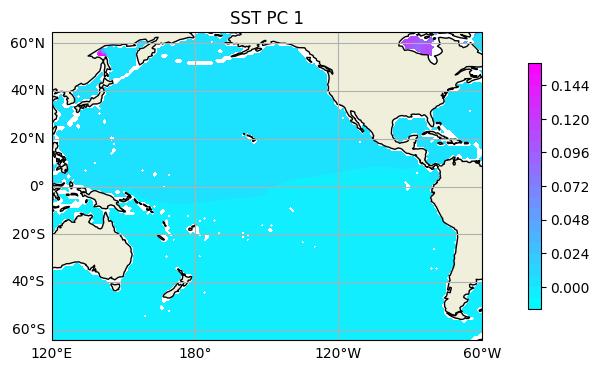

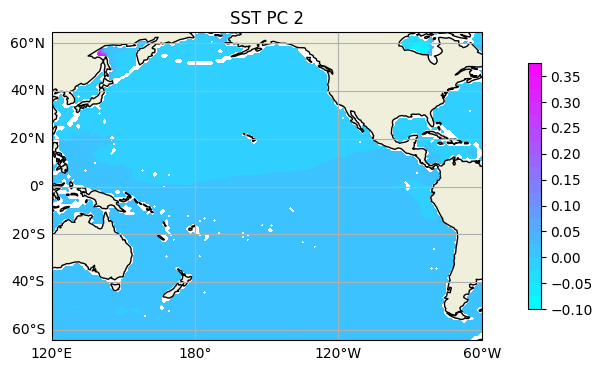

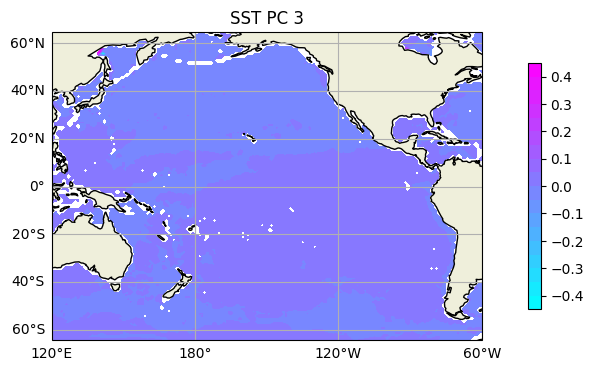

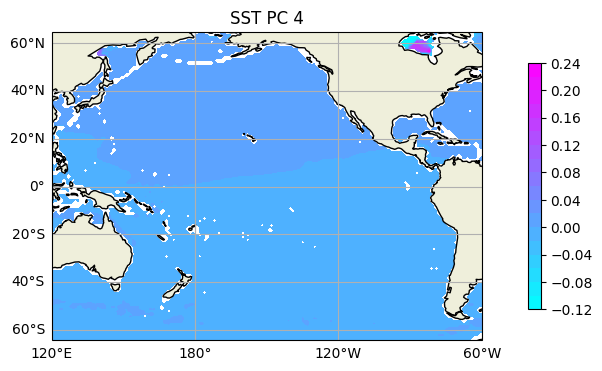

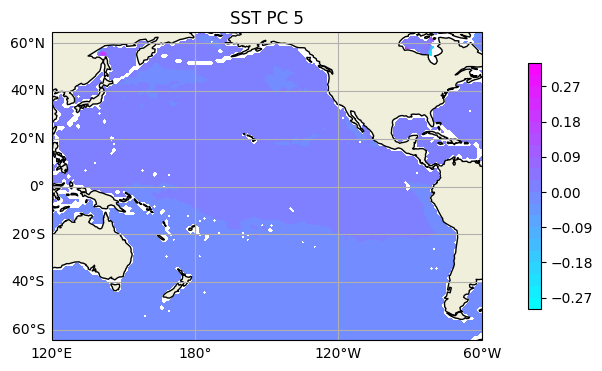

In [16]:
for pc in range(5):
    my_plot(sst_eof[pc], X, Y, f'SST PC {pc+1}', proj, data_crs, '')

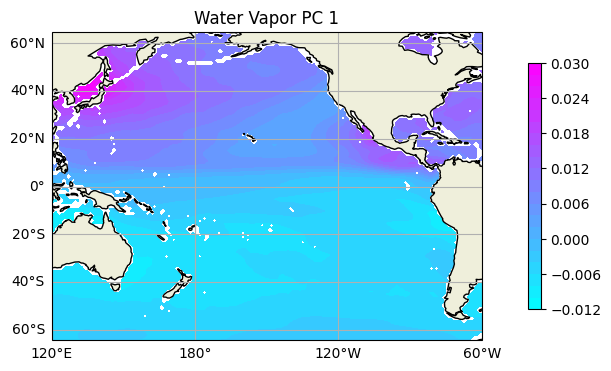

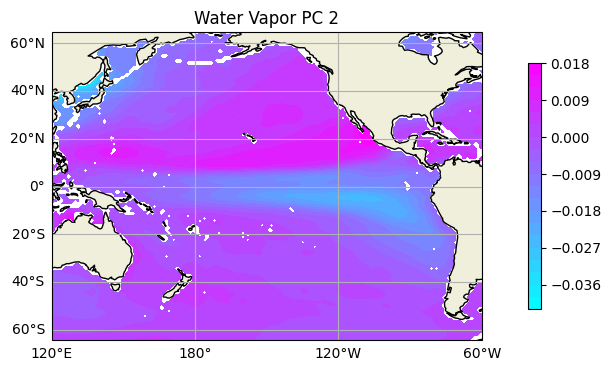

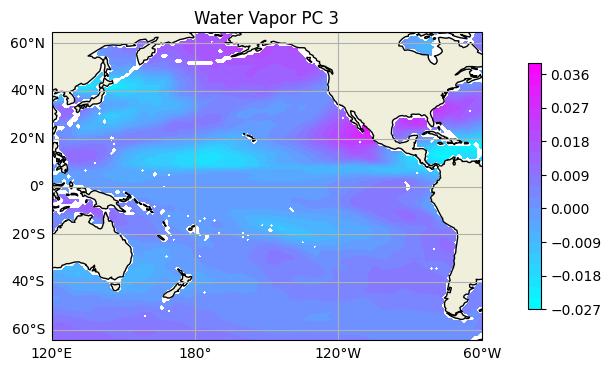

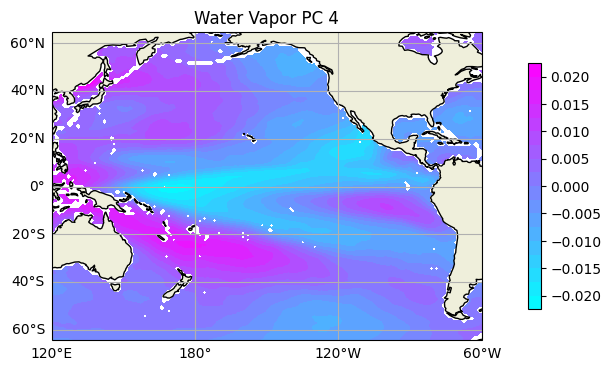

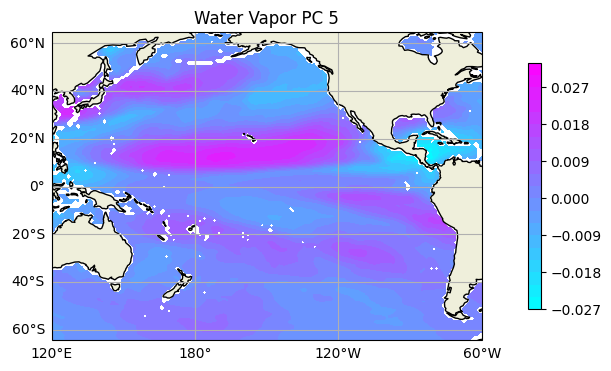

In [17]:
for pc in range(5):
    my_plot(wv_eof[pc], X, Y, f'Water Vapor PC {pc+1}', proj, data_crs, '')

# Part 4

(1.0, 10.0)

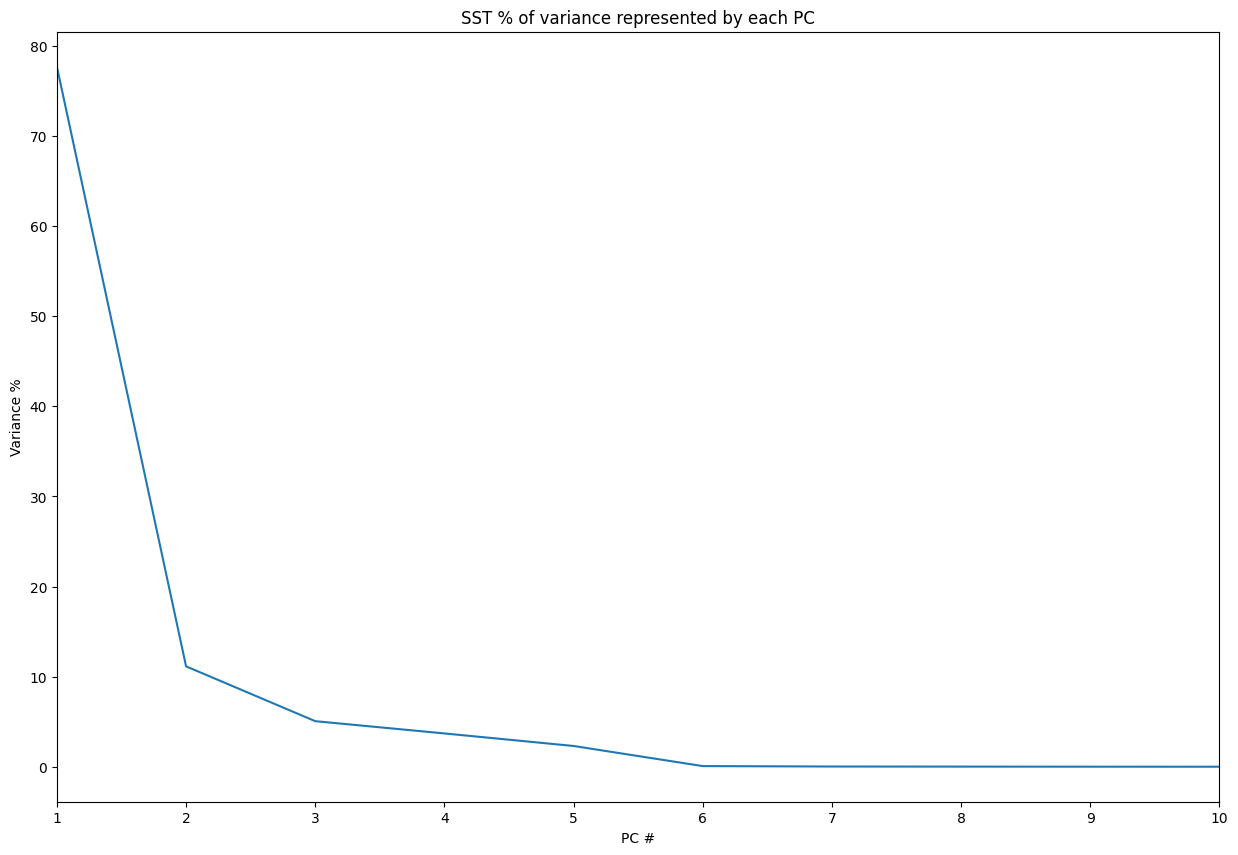

In [18]:
plt.figure(figsize=(15,10))
plt.plot(range(1,11), sst_solver.varianceFraction()[0:10]*100)
plt.title('SST % of variance represented by each PC')
plt.xlabel('PC #')
plt.ylabel('Variance %')
plt.xlim(1, 10)

(1.0, 10.0)

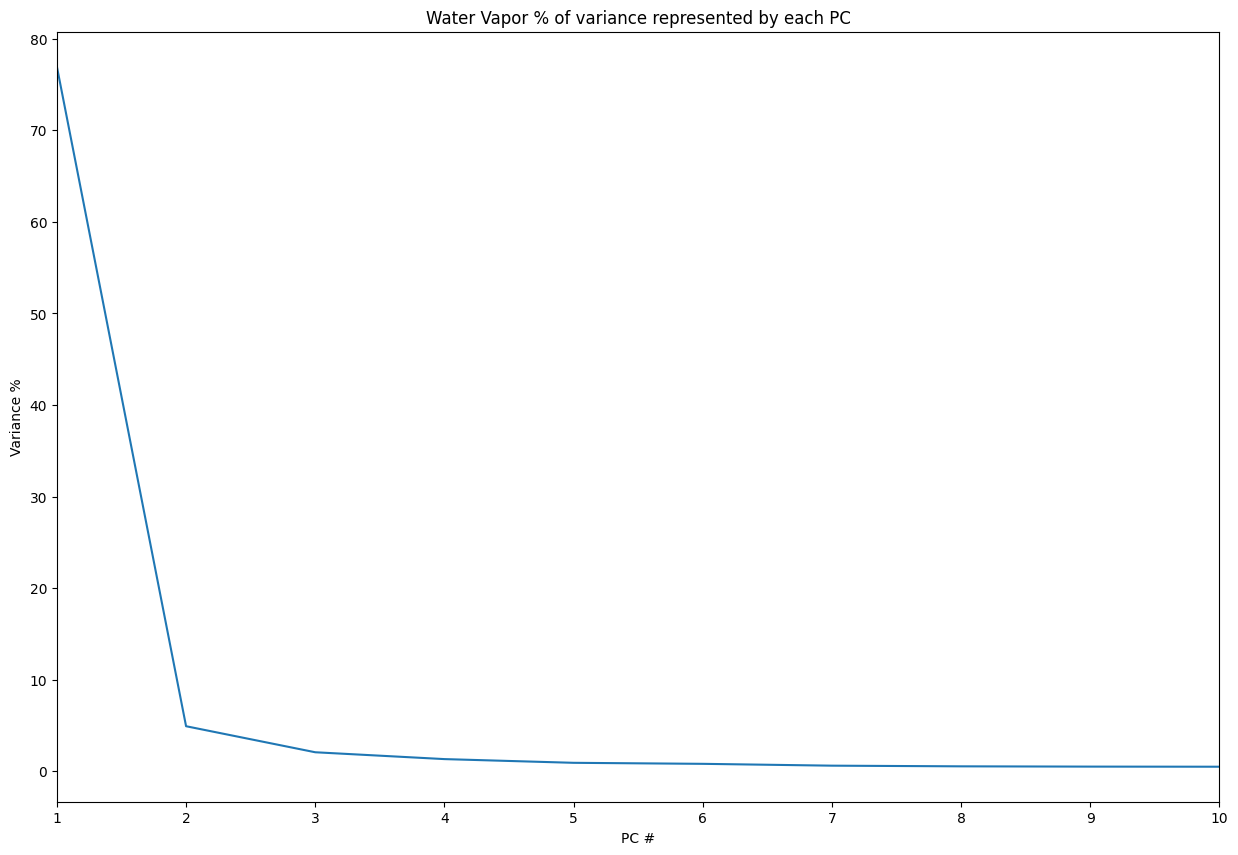

In [19]:
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wv_solver.varianceFraction()[0:10]*100)
plt.title('Water Vapor % of variance represented by each PC')
plt.xlabel('PC #')
plt.ylabel('Variance %')
plt.xlim(1, 10)

# Part 5

In [20]:
reconstructed_sst = sst_solver.reconstructedField(5)
reconstructed_sst

<xarray.DataArray (time: 516, lat: 130, lon: 181)>
array([[[            nan,             nan,             nan, ...,
          2.24051154e+02,  5.62751456e+02,  4.00832151e+01],
        [            nan,             nan,             nan, ...,
          4.90068854e+02,  9.35791800e+00, -1.51728554e+00],
        [            nan,             nan,             nan, ...,
         -1.99820071e+00, -2.04263988e+00, -1.64642651e+00],
        ...,
        [ 5.91354502e+00,  6.02384838e+00,  5.64460703e+00, ...,
          5.01177638e+00,             nan,             nan],
        [ 9.83937907e+00,  9.11831006e+00,  7.22018759e+00, ...,
                     nan,             nan,             nan],
        [ 1.81477647e+01,  1.40781300e+01,  1.53477859e+01, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
         -2.95646092e+03, -1.27200398e+03, -4.17926916e+01],
        [            nan,             nan,             nan, ...,
          1.33290707e+02, -3.60980405e+01, -5.95847502e+00],
        [            nan,             nan,             nan, ...,
         -1.72878961e+01, -4.58075352e+00, -2.21247367e+00],
...
        [-3.62476973e+00, -3.61178021e+00, -3.30378062e+00, ...,
         -2.74309770e+00,             nan,             nan],
        [-6.08438375e+00, -5.64806810e+00, -4.39583977e+00, ...,
                     nan,             nan,             nan],
        [-1.15818334e+01, -8.82736725e+00, -9.74821714e+00, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          1.09711943e+03,  5.60669643e+02,  4.68910774e+01],
        [            nan,             nan,             nan, ...,
          5.11343083e+02,  1.94756698e+01,  3.32010233e+00],
        [            nan,             nan,             nan, ...,
          1.11571941e+01,  3.07686725e+00,  1.82526642e+00],
        ...,
        [-3.59756549e+00, -3.58402040e+00, -3.27696454e+00, ...,
         -2.71913365e+00,             nan,             nan],
        [-6.04738868e+00, -5.61325270e+00, -4.36593279e+00, ...,
                     nan,             nan,             nan],
        [-1.15220855e+01, -8.77908945e+00, -9.69699865e+00, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
  * lat        (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon        (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
    reftime    (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
    latitude   (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
    longitude  (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
Attributes:
    long_name:  None_reconstructed_with_5_EOFs

In [21]:
correlation = xr.corr(reconstructed_sst, sst_detrend, dim='time')

/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


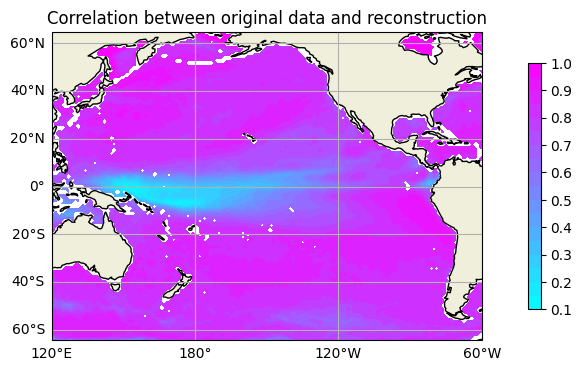

In [22]:
my_plot(correlation, X, Y, f'Correlation between original data and reconstruction', proj, data_crs, '')

# Part 6

/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


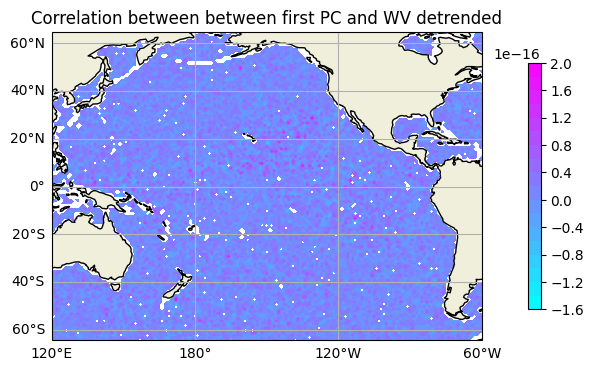

In [23]:
my_plot(xr.corr(sst_eof[0], wv_detrend, dim='time'), X, Y, f'Correlation between between first PC and WV detrended', proj, data_crs, '')

/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brad/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


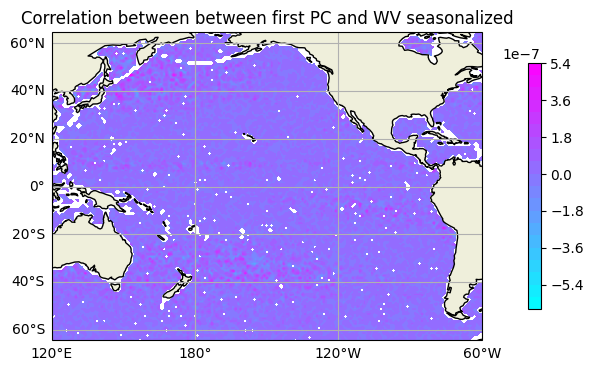

In [24]:
my_plot(xr.corr(sst_eof[0], wv_standardized, dim='time'), X, Y, f'Correlation between between first PC and WV seasonalized', proj, data_crs, '')